# Prosper Loans - Data Visualization
## by Ernest Rowe

#### Dataset: [Loan Data from Prosper](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1546576456543000)

> This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. More information on the variables in this dataset can be found [here](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1546576456544000).

In [1]:
# import all packages, set plots to be embedded inline, & set pandas max_columns to none.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Import loan data & display summary of data.
df = pd.read_csv('./data/prosper_loan_data.csv', parse_dates=['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 
                                                              'FirstRecordedCreditLine', 'LoanOriginationDate'])

display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null datetime64[ns]
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null datetime64[ns]
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
Prospe

None

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.

In [3]:
# Duplicate records are identical except for their ProsperScore value.
duplicate_loans = df[df.ListingKey.duplicated()].ListingKey.values
for i in range(5):
    display(df[df.ListingKey == duplicate_loans[i]])

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117,NaN,36,Current,NaT,0.0762,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,9.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.0,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12,Q4 2013,49A53699682291323D04D66,305.54,611.08,505.58,105.5,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117,NaN,36,Current,NaT,0.0762,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.0,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12,Q4 2013,49A53699682291323D04D66,305.54,611.08,505.58,105.5,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
998,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053,NaN,60,Current,NaT,0.1771,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,6.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.0,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12,Q1 2014,98A937006186534818378B9,239.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053,NaN,60,Current,NaT,0.1771,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,7.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.0,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12,Q1 2014,98A937006186534818378B9,239.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
57494,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053,NaN,60,Current,NaT,0.1771,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,8.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.0,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12,Q1 2014,98A937006186534818378B9,239.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1554,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037,NaN,60,Current,NaT,0.14528,0.1224,0.1124,0.10731,0.0424,0.06491,5.0,B,9.0,1,NJ,Police Officer/Correction Officer,Employed,107.0,True,False,NaN,2014-03-07 10:04:00,720.0,739.0,1996-07-01,19.0,18.0,27.0,15,1024.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,20802.0,0.4,26503.0,26.0,1.0,1.0,0.18,"$100,000+",True,10833.333333,DC303708663304668E74587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,135375,35000,2014-03-11,Q1 2014,07B33702526608187DB957A,782.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037,NaN,60,Current,NaT,0.14528,0.1224,0.1124,0.10731,0.0424,0.06491,5.0,B,10.0,1,NJ,Police Officer/Correction Officer,Employed,107.0,True,False,NaN,2014-03-07 10:04:00,720.0,739.0,1996-07-01,19.0,18.0,27.0,15,1024.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,20802.0,0.4,26503.0,26.0,1.0,1.0,0.18,"$100,000+",True,10833.333333,DC303708663304668E74587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,135375,35000,2014-03-11,Q1 2014,07B33702526608187DB957A,782.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1803,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317,NaN,36,Current,NaT,0.35356,0.3134,0.3034,0.27598,0.1625,0.11348,1.0,HR,3.0,7,MI,Laborer,Employed,336.0,True,False,NaN,2013-09-26 09:35:36,640.0,659.0,1978-09-01,7.0,6.0,39.0,6,129.0,3.0,9.0,0.0,0.0,56.0,1.0,0.0,943.0,0.51,798.0,31.0,0.56,2.0,0.07,"$50,000-74,999",True,4583.333333,8D84369399064302947D8B5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,103928,4000,2013-10-01,Q4 2013,5E653693258374071BBC02C,172.76,863.8,362.81,500.99,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317,NaN,36,Current,NaT,0.35356,0.3134,0.3034,0.27598,0.1625,0.11348,1.0,HR,2.0,7,MI,Laborer,Employed,336.0,True,False,NaN,2013-09-26 09:35:36,640.0,659.0,1978-09-01,7.0,6.0,39.0,6,129.0,3.0,9.0,0.0,0.0,56.0,1.0,0.0,943.0,0.51,798.0,31.0,0.56,2.0,0.07,"$50,000-74,999",True,4583.333333,8D84369399064302947D8B5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,103928,4000,2013-10-01,Q4 2013,5E653693258374071BBC02C,172.76,863.8,362.81,500.99,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
5811,94B035909835592957503E6,920397,2013-09-24 13:27:48.287,NaN,36,Current,NaT,0.24205,0.2045,0.1945,0.1797,0.0899,0.0898,4.0,C,3.0,1,GA,NaN,Other,0.0,True,False,NaN,2013-10-30 17:36:21,700.0,719.0,1986-02-10,19.0,18.0,35.0,16,1383.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47018.0,0.96,1513.0,34.0,1.0,2.0,0.62,"$50,000-74,999",True,4166.666667,129C369881799628360C904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,110525,15000,2013-11-14,Q4 2013,37A336938902363103488F4,560.9,1674.2959,925.57,748.7259,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287,NaN,36,Current,NaT,0.24205,0.2045,0.1945,0.1797,0.0899,0.0898,4.0,C,4.0,1,GA,NaN,Other,0.0,True,False,NaN,2013-10-30 17:36:21,700.0,719.0,1986-02-10,19.0,18.0,35.0,16,1383.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47018.0,0.96,1513.0,34.0,1.0,2.0,0.62,"$50,000-74,999",True,4166.666667,129C369881799628360C904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,110525,15000,2013-11-14,Q4 2013,37A336938902363103488F4,560.9,1674.2959,925.57,748.7259,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
# Remove duplicates & drop PrsoperScore column. Remaining entries should have unique ListingKeys.
df = df[~df.ListingKey.duplicated()].drop(columns='ProsperScore').reset_index(drop=True)
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,3

In [79]:
# Create column with Year & Month from LoanOriginationDate column.
df['OriginationYearMonth'] = df.LoanOriginationDate.dt.to_period('m')

In [247]:
# Create column with Year from LoanOriginationDate column.
df['OriginationYear'] = df.LoanOriginationDate.dt.to_period('y').astype('category')

In [5]:
# CreditGrade was replaced by ProsperRating (Alpha) for loans originated after July 2009. Create a combined column with all
    # ratings.
df['ProsperCreditGrade'] = df['ProsperRating (Alpha)'].astype(str).str.replace('nan', '') +\
                           df['CreditGrade'].astype(str).str.replace('nan', '')

df['ProsperCreditGrade'].head()

0     C
1     A
2    HR
3     A
4     D
Name: ProsperCreditGrade, dtype: object

In [6]:
# Fill blank spaces with N/A.
df['ProsperCreditGrade'] = df.ProsperCreditGrade.replace('', 'N/A')
df['ProsperCreditGrade'].unique()

array(['C', 'A', 'HR', 'D', 'B', 'E', 'AA', 'N/A', 'NC'], dtype=object)

In [7]:
df['ListingCategory (numeric)'].value_counts().index.sort_values()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')

In [8]:
# Create ListingCategory column by remapping ListingColumn (numeric) values to their string counterparts.
listing_cat = {0:'Not Available', 
               1:'Debt Consolidation',
               2:'Home Improvement', 
               3:'Business', 
               4:'Personal Loan', 
               5:'Student Use', 
               6:'Auto', 
               7:'Other', 
               8:'Baby & Adoption', 
               9:'Boat', 
               10:'Cosmetic Procedure', 
               11:'Engagement Ring', 
               12:'Green Loans', 
               13:'Household Expenses', 
               14:'Large Purchases', 
               15:'Medical/Dental', 
               16:'Motorcycle', 
               17:'RV', 
               18:'Taxes', 
               19:'Vacation', 
               20:'Wedding Loans'}

df['ListingCategory'] = df['ListingCategory (numeric)'].map(listing_cat)

In [9]:
# Convert Term column from months to years.
df['Term'] = df.Term.astype(str).str.replace('12', '1 Year').str.replace('36', '3 Years').str.replace('60', '5 Years')
df['Term'].unique()

array(['3 Years', '5 Years', '1 Year'], dtype=object)

In [10]:
# Fill EmploymentStatus 'nan' values with 'Not available'
df.EmploymentStatus.fillna('Not available', inplace=True)

In [11]:
# Check EmploymentStatus values.
df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

In [12]:
# Fill Occupation 'nan' values with 'N/A'
df.Occupation.fillna('N/A', inplace=True)

In [13]:
# Check Occupation values.
df.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'N/A', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist'

In [14]:
# Convert ProsperCreditGrade & LoanStatus to categorical dtype.
ordinal_var_dict = {'ProsperCreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA', 'N/A'],
                    'LoanStatus': ['Canceled', 'Chargedoff', 'Defaulted', 'Past Due (>120 days)', 'Past Due (91-120 days)',
                                   'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (16-30 days)',
                                   'Past Due (1-15 days)', 'Current', 'FinalPaymentInProgress', 'Completed'],
                    'Term': ['1 Year', '3 Years', '5 Years']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [15]:
# Confirm dtype changed.
df.dtypes

ListingKey                                     object
ListingNumber                                   int64
ListingCreationDate                    datetime64[ns]
CreditGrade                                    object
Term                                         category
LoanStatus                                   category
ClosedDate                             datetime64[ns]
BorrowerAPR                                   float64
BorrowerRate                                  float64
LenderYield                                   float64
EstimatedEffectiveYield                       float64
EstimatedLoss                                 float64
EstimatedReturn                               float64
ProsperRating (numeric)                       float64
ProsperRating (Alpha)                          object
ListingCategory (numeric)                       int64
BorrowerState                                  object
Occupation                                     object
EmploymentStatus            

In [16]:
# Confirm changes.
display(df.info())
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 82 columns):
ListingKey                             113066 non-null object
ListingNumber                          113066 non-null int64
ListingCreationDate                    113066 non-null datetime64[ns]
CreditGrade                            28953 non-null object
Term                                   113066 non-null category
LoanStatus                             113061 non-null category
ClosedDate                             55076 non-null datetime64[ns]
BorrowerAPR                            113041 non-null float64
BorrowerRate                           113066 non-null float64
LenderYield                            113066 non-null float64
EstimatedEffectiveYield                83982 non-null float64
EstimatedLoss                          83982 non-null float64
EstimatedReturn                        83982 non-null float64
ProsperRating (numeric)                83982 non-null float64
P

None

ListingKey                             113066
ListingNumber                          113066
ListingCreationDate                    113064
CreditGrade                                 8
Term                                        3
LoanStatus                                 11
ClosedDate                               2802
BorrowerAPR                              6677
BorrowerRate                             2294
LenderYield                              2283
EstimatedEffectiveYield                  1582
EstimatedLoss                             120
EstimatedReturn                          1476
ProsperRating (numeric)                     7
ProsperRating (Alpha)                       7
ListingCategory (numeric)                  21
BorrowerState                              51
Occupation                                 68
EmploymentStatus                            8
EmploymentStatusDuration                  605
IsBorrowerHomeowner                         2
CurrentlyInGroup                  

In [17]:
# Descriptive statistics of numeric variables.
df.describe()

,ListingNumber,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.130660e+05,113041.000000,113066.000000,113066.000000,83982.000000,83982.000000,83982.000000,83982.000000,113066.000000,105441.000000,112475.000000,112475.000000,105462.000000,105462.000000,112369.000000,113066.000000,113066.000000,112369.000000,111907.000000,112369.000000,105444.000000,112076.000000,112369.000000,105462.000000,1.054620e+05,105462.000000,105522.000000,105522.000000,105522.000000,105522.000000,104594.000000,1.130660e+05,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,18912.000000,113066.000000,16952.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000
mean,6.248036e+05,0.218980,0.192946,0.182882,0.168870,0.080417,0.096246,4.068705,2.776838,96.060584,685.524961,704.524961,10.307058,9.248336,26.746380,6.959466,397.820998,1.438600,5.590812,0.595129,986.818434,4.158892,0.312764,0.015209,1.759230e+04,0.561088,11208.182028,23.221518,0.885552,0.802089,0.276032,5.605120e+03,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,153.991403,16.268464,32.121770,69044.527992,8314.762307,271.932742,4209.236052,3125.487227,1083.748825,-55.019639,-14.350991,705.842206,686.669798,25.336372,0.998573,0.048379,0.023641,16.678249,80.876143
std,3.273262e+05,0.080483,0.074917,0.074612,0.068607,0.046851,0.030475,1.675442,3.998188,94.432241,66.635895,66.635895,5.458196,5.021249,13.643731,4.629303,447.657266,2.444093,6.446342,1.984234,7156.683653,10.163465,0.728792,0.154691,3.294590e+04,0.318189,19847.681185,11.875303,0.148428,1.097975,0.553738,7.495596e+03,0.763711,19.248708,18.828595,2.446576,0.557171,7389.362099,3804.772154,50.063023,467.919931,9.005898,29.978915,38800.158867,6237.007841,192.549979,4798.081994,4076.877459,1185.533024,60.794092,109.645216,2396.901814,2365.467115,276.708803,0.017987,0.333580,0.233296,295.674170,103.340277
min,4.000000e+00,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,3.976670e+05,0.156290,0.134000,0.124500,0.116000,0.042400,0.074630,3.000000,1.000000,26.000000,660.000000,679.000000

### What is the structure of your dataset?

> There are 113066 loans in the cleaned dataset with 81 features in total. This far too may features to explore, so I'll only be focused on the most important ones. Most variables in the dataset are numeric, but there's a few categorical variables I'll be exploring as well.  

##### Worst &rarr; Best 
`ProsperCreditGrade`: NC, HR, E, D, C, B, A, AA, N/A <br>
* NC means No Credit and is only present in loans originated before July 2009. N/A means there wasn't a credit grade assigned; potentially because of previous accounts with Prosper Loans. HR means High Risk and E &rarr; AA are credit grades in ascending order.

`LoanStatus`: Canceled, Chargedoff, Defaulted, Past Due (>120 days), Past Due (91-120 days), Past Due (61-90 days), Past Due (31-60 days), Past Due (16-30 days), Past Due (1-15 days), Current, FinalPaymentInProgress, Completed <br> <br>
##### Shortest &rarr; Longest
`Term`: 1 Year, 3 Years, 5 Years

### What is/are the main feature(s) of interest in your dataset?

> I'd like to see how loan amount & interest rate differ between different types of borrowers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the most useful features to explore will be credit grades, credit scores, occupation, loan purpose, income, & origination date.

## Univariate Exploration

> In this section, I'll be investigating the distributions of individual variables. The first variable I'll be exploring is `LoanOriginalAmount`.

In [18]:
df.LoanOriginalAmount.describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

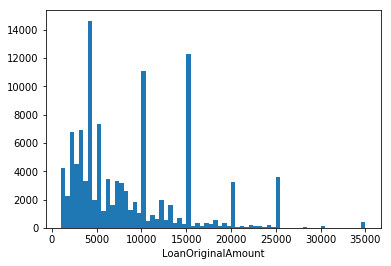

In [19]:
bins = np.arange(1000, df.LoanOriginalAmount.max() + 500, 500)

plt.hist(df.LoanOriginalAmount, bins=bins)
plt.xlabel('LoanOriginalAmount');

Most loan amounts fell in the buckets divisible by $\$$1,000 and a significant portion of those were divisible by $\$$5,000. I'd expect the loan purpose to be a good predictor of whether or not the loan amount falls in one of these buckets. I'm guessing debt consolidation loans are more likely to be for specific dollar amounts.

Next, I'll be exploring BorrowerRate. I chose this instead of BorrowerAPR because the BorrowerAPR will be more affected by the loan term than the BorrowerRate would be.

In [20]:
df.BorrowerRate.describe()

count    113066.000000
mean          0.192946
std           0.074917
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250600
max           0.497500
Name: BorrowerRate, dtype: float64

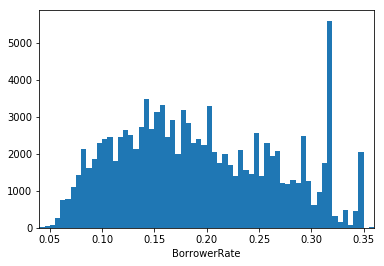

In [21]:
bins = np.arange(0, df.BorrowerRate.max()+0.005, 0.005)

plt.hist(df.BorrowerRate, bins=bins)
plt.xlabel('BorrowerRate')
plt.xlim(0.04, 0.36);

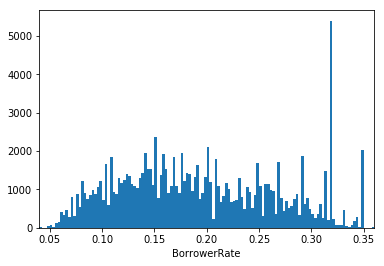

In [22]:
bins = np.arange(0, df.BorrowerRate.max()+0.0025, 0.0025)

plt.hist(df.BorrowerRate, bins=bins)
plt.xlabel('BorrowerRate')
plt.xlim(0.04, 0.36);

In [23]:
df.BorrowerRate.value_counts().head()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1314
Name: BorrowerRate, dtype: int64

In [24]:
print('Most common BorrowerRate: {}%'.format(df.BorrowerRate.mode()[0]*100))
print('Number of loans at {}% interest rate: {}'.format(df.BorrowerRate.mode()[0]*100, (df.BorrowerRate == df.BorrowerRate.mode()[0]).sum()))

Most common BorrowerRate: 31.77%
Number of loans at 31.77% interest rate: 3672


Although the `BorrowerRate` was tapering off as interest rates got higher, there was a large spike at 31.77% and another smaller spike at 35%. I'm guessing there was a surge in demand whenever the lender was offering these rates. I'll be exploring the relationship between `BorrowerRate` & `LoanOriginationDate` in the next section.

Now I'll explore my ordinal categorical variables: `ProsperCreditGrade`, `LoanStatus`, & `Term`.

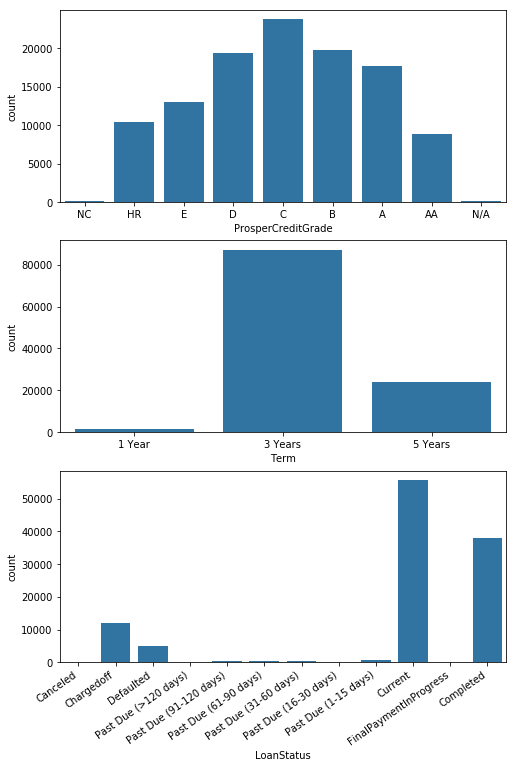

In [25]:
fig, ax = plt.subplots(nrows=3, figsize=[8,12])
plt.subplots_adjust(hspace=0.2)
base_color = sns.color_palette()[0]

ax0 = sns.countplot(data=df, x='ProsperCreditGrade', color=base_color, ax=ax[0])
ax1 = sns.countplot(data=df, x='Term', color=base_color, ax=ax[1])
ax2 = sns.countplot(data=df, x='LoanStatus', color=base_color, ax=ax[2])
ax2.set_xticklabels(ordinal_var_dict['LoanStatus'], rotation=35, ha='right');

Like school grades, the `ProsperCreditGrade`s distribution is unimodal around a C average. Very few people had NC or N/A `ProsperCreditGrade`s. The distribution for `LoanStatus` is about what you'd expect. The vast majority of loans fell into the "Current" or "Completed" categories with very few loans in each of the "Past Due" bins. The percentage of loans that were "Defaulted" on is pretty low, but only because many of them were "Chargedoff" and sent to a debt collector. The overwhelming majority of loans had a 3 year `Term`. This seems to be a happy medium between having a high payment on a short loan term and paying a lot of interest on a longer term loan.

Now that I've explored ordinal categorical variables, I'll look at non-ordered categories such as `BorrowerState`, `Occupation`, & `EmploymentStatus`.

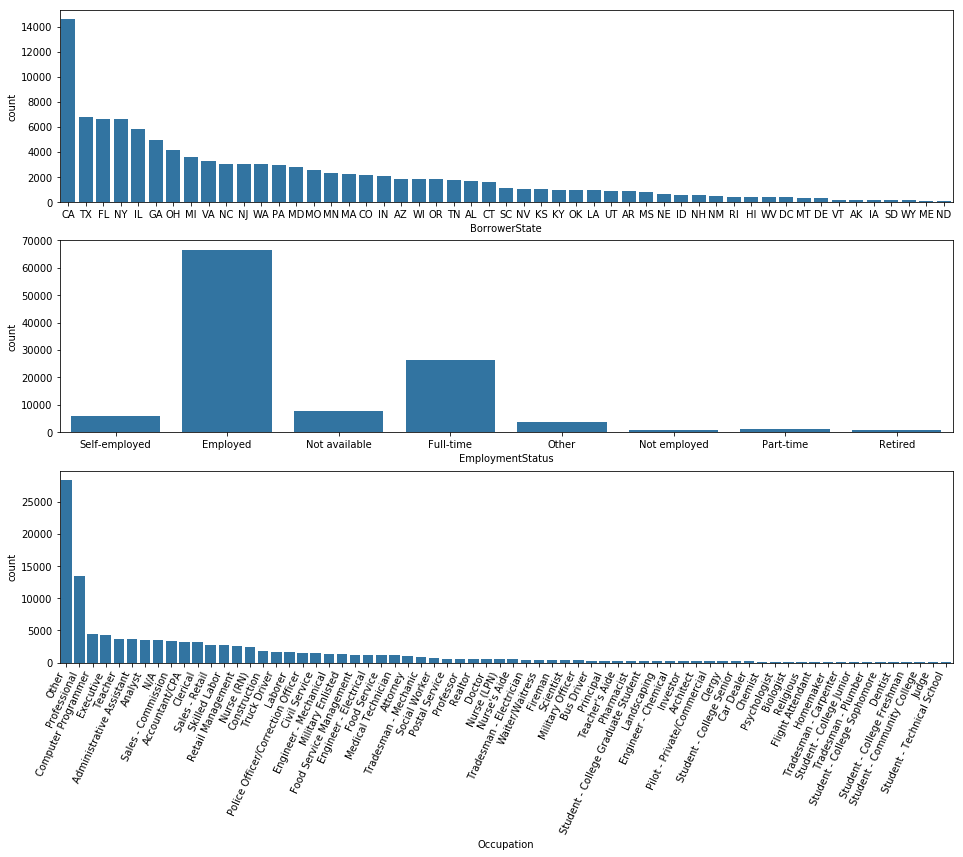

In [26]:
fig, ax = plt.subplots(nrows=3, figsize=[16,12])

base_color = sns.color_palette()[0]
BorrowerState_ord = df.BorrowerState.value_counts().index
Occupation_ord = df.Occupation.value_counts().index

ax0 = sns.countplot(data=df, x='BorrowerState', color=base_color, ax=ax[0], order=BorrowerState_ord)
ax1 = sns.countplot(data=df, x='EmploymentStatus', color=base_color, ax=ax[1]);
ax2 = sns.countplot(data=df, x='Occupation', color=base_color, ax=ax[2], order=Occupation_ord)
ax2.set_xticklabels(Occupation_ord, rotation=65, ha='right');

As you'd expect, there's a strong correlation between `BorrowerState` & and state population. `EmploymentStatus` is a kind of a mess with multiple "Employed" values to pick from. This makes it somewhat difficult to differentiate betwen "Employed" & "Full-time," but I should still be able to compare "Employed" vs. "Not employed" later. With the `Occupation` variable we can see that very few students took out loans compared to other occupations. There's a lot of possible values in this column, so it'd be hard to get a fair comparison of all of them. I'm interested to see what how commissioned workers compare to non-commissioned workers. I'd also like to see how tradesmen compare to other professionals.

Next I'll be looking at `CreditScoreRangeLower` & `CreditScoreRangeUpper`.

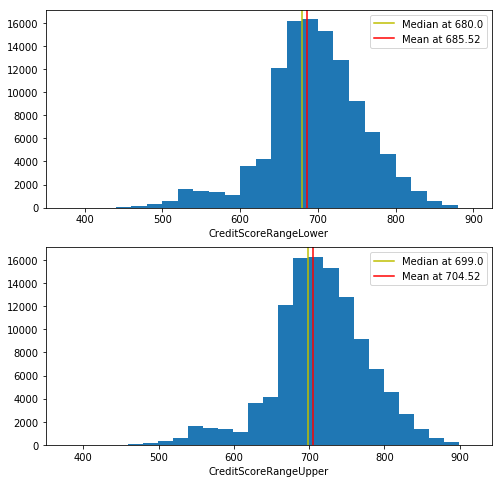

In [36]:
fig, ax = plt.subplots(nrows=2, figsize=[8,8])

variables = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']

for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df[var]), max(df[var])+20, 20)
    ax[i].hist(df[var], bins=bins, label=None)
    ax[i].set_xlim(350)
    ax[i].set_xlabel(var)
    ax[i].axvline(df[var].median(), color='y', label='Median at {}'.format(round(df[var].median(), 2)))
    ax[i].axvline(df[var].mean(), color='r', label='Mean at {}'.format(round(df[var].mean(), 2)))
    ax[i].legend()

In [42]:
df[df['CreditScoreRangeLower'].isna()].shape[0]

591

In [38]:
df[df['CreditScoreRangeLower'].isna()].LoanOriginationDate.max()

Timestamp('2006-05-01 00:00:00')

In [37]:
with pd.option_context('display.max_rows', 1000):
    display(df[df['CreditScoreRangeLower'] < 400])

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ProsperCreditGrade,ListingCategory
793,00EF338150577356881AD6B,97950,2007-02-11 13:40:55.490,NC,3 Years,Completed,2010-02-22,0.29776,0.2900,0.2850,NaN,NaN,NaN,NaN,NaN,0,NaN,Other,Not available,NaN,False,False,NaN,2007-02-11 12:46:31.633,0.0,19.0,NaT,NaN,NaN,NaN,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,Not displayed,True,115.583333,9C783382679752780A231FD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,85,7697,4000,2007-02-22,Q1 2007,60493379289275032D64C21,167.62,6028.14,4000.00,2028.14,-34.97,0.0000,0.00,0.00,0.00,1.0,0,0,0.0,38,NC,Not Available
911,7A41337257909407897EB67,61512,2006-11-14 08:23:08.430,NC,3 Years,Defaulted,2007-11-18,0.27276,0.2600,0.2450,NaN,NaN,NaN,NaN,NaN,0,IL,Clerical,Not available,NaN,False,True,FE113364863511529673D04,2006-11-10 06:15:36.980,0.0,19.0,2001-03-21,NaN,NaN,2.0,0,0.0,0.0,2.0,0.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03000,Not displayed,True,2316.666667,219A3374837043585EE9D11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158,12.0,88,4746,1500,2006-11-20,Q4 2006,3204337306322107592F3A8,60.44,414.88,209.79,205.09,-4.10,0.0000,1290.20,1290.21,0.00,1.0,0,0,0.0,11,NC,Not Available
1683,403F33816853903261A0142,94290,2007-02-06 15:50:46.723,NC,3 Years,Chargedoff,2008-04-20,0.18065,0.1625,0.1575,NaN,NaN,NaN,NaN,NaN,0,NaN,Other,Not available,NaN,False,False,NaN,2007-02-06 08:28:22.457,0.0,19.0,NaT,NaN,NaN,NaN,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not displayed,True,1600.000000,49213381523869980CEE7ED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2271,14.0,85,7691,1000,2007-02-21,Q1 2007,CF073373650048977B01CCC,35.28,297.84,153.81,144.03,-1.11,-19.1100,846.17,846.19,0.00,1.0,0,0,0.0,64,NC,Not Available
4287,4B4C33658186085093BB6B4,7055,2006-04-23 14:19:41.030,NC,3 Years,Chargedoff,2007-12-25,0.24502,0.2375,0.2325,NaN,NaN,NaN,NaN,NaN,0,NaN,N/A,Not available,NaN,False,False,F4E13366162858013BE1046,2006-04-23 14:08:38.650,0.0,19.0,2000-08-21,NaN,NaN,6.0,0,0.0,2.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10368,Not displayed,True,2916.666667,227C336582331295560AE98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2388,20.0,95,618,4000,2006-04-26,Q2 2006,38A033656115101140C13B0,156.41,2341.15,1328.65,1012.50,-21.31,0.0000,2671.35,2671.35,0.00,1.0,0,0,0.0,24,NC,Not Available
4368,985433663733409747DA533,31236,2006-08-14 11:45:59.710,NC,3 Years,Defaulted,2007-09-26,0.24505,0.2325,0.2150,NaN,NaN,NaN,NaN,NaN,0,TX,Truck Driver,Not available,NaN,Fals

Here we can see that the `CreditScoreRange` columns are exactly the same shape. When comparing individuals in the dataset, their `Upper` scores are exactly 19 points higher than their `Lower` scores. This can also be seen by comparing the mean of each of the plots above. There was only one loan where the borrower had a credit score less than 400. Everyone else under 400 had a falsely reported `CreditScoreRange` of 0-19 and a `CreditGrade` of NC. There were also 591 NaN values in the dataset, but I've chosen not to drop them since they still have `CreditGrade`s.

Another big factor in determing a borrowers eligibility is income. Individuals with a higher income should be able to make payments more easily, but do these people actually need loans? I'll visualize `StatedMonthlyIncome` below to find out. 

In [29]:
np.log10(df.StatedMonthlyIncome.describe())

C:\Users\Ernest\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


count    5.053332
mean     3.748585
std      3.874806
min          -inf
25%      3.505068
50%      3.669007
75%      3.834083
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

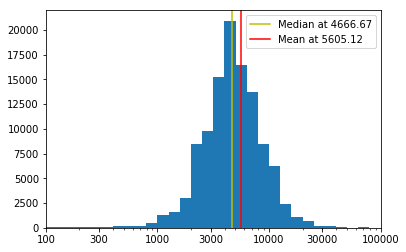

In [30]:
x_ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]

log_bins = 10 ** np.arange(0, np.log10(df.StatedMonthlyIncome.max())+0.1, 0.1)
plt.hist(df.StatedMonthlyIncome, bins=log_bins, label=None)
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.axvline(df.StatedMonthlyIncome.median(), color='y', label='Median at {}'.format(round(df.StatedMonthlyIncome.median(), 2)))
plt.axvline(df.StatedMonthlyIncome.mean(), color='r', label='Mean at {}'.format(round(df.StatedMonthlyIncome.mean(), 2)))
plt.xlim(100, 100000)
plt.legend();

When plotted on a log-scale, `StatedMonthlyIncome` has a unimodal distribution that's slightly skewed to the right. Even people with high income (or at least those that claim to have high income) take out loans, but I'd expect their `ListingCategory` to be different.

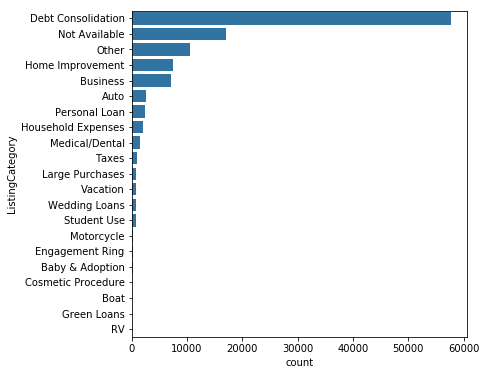

In [31]:
plt.figure(figsize=[6,6])
sns.countplot(data=df, y='ListingCategory', color=base_color, order=df.ListingCategory.value_counts().index);

Debt Consolidation was the most popular `ListingCategory` by far. I'd expect those borrowers to have a different profile than those that took out Home Improvement or Business loans.

The next variables I'll look at are `OriginationYearMonth` & `OriginationYear`.

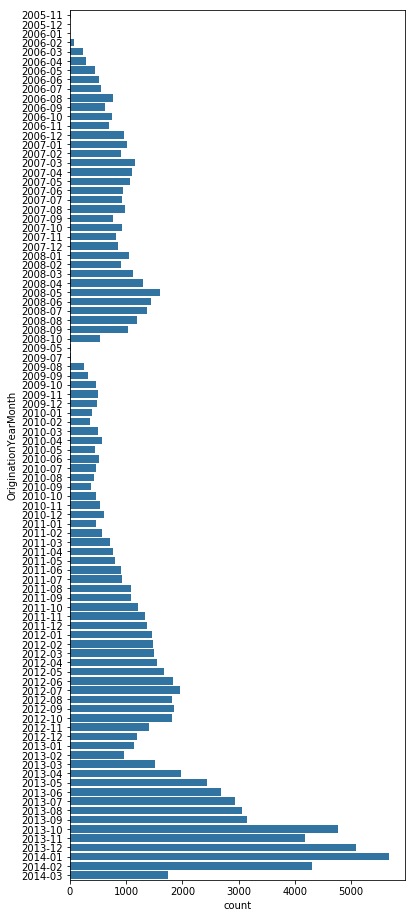

In [80]:
# Use .strftime('%B %Y') to format labels.
plt.figure(figsize=[6,16])

order = df.OriginationYearMonth.value_counts().sort_index().index

sns.countplot(y=df.OriginationYearMonth, color=base_color, order=order);

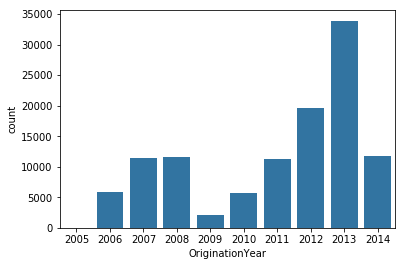

In [238]:
order = df.OriginationYear.value_counts().sort_index().index

sns.countplot(x=df.OriginationYear, color=base_color, order=order);

The number of loans orignated each month was steadily climbing in the mid 2000's before dropping off a cliff in at the end of 2008. It wasn't until mid way through 2012 that Prosper Loans got back to their pre-housing crisis volume, but once they did, they were able to double their monthly originations within a couple of years. I expect to see a correlation between low interest rates & high origination volume.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of both `LoanOriginalAmount` & `BorrowerRate` were multimodal. The peaks for `LoanOriginalAmount` were every $\$$5,000 and the two largest peaks for `BorrowerRate` were at 31.77% & 35%. No transformations were needed on my variables of interest.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The only feature I investigated that had an unusual distribution was `StatedMonthlyIncome` which had a log-normal distribution. There were a few features I cleaned up a bit before plotting. There were duplicates in the dataset that only differed in their `ProsperScore`, so the duplicate records were dropped along with the `ProsperScore` column. I then created a new column that combined both `ProsperRating (Alpha)` & `CreditGrade` into a single column I named `ProsperCreditGrade` so I could visualize ratings from before and after July 2009. Another column was created to convert `ListingCategory (Numeric)` into the corresponding string values and a third `OriginationYearhMonth` column was made using the `LoanOriginationDate` column. The `Term` column was converted from months to years to better match the terminology used by most people. `ProsperCreditGrade`, `LoanStatus`, & `Term` were all converted to ordinal categorical dtype and `NaN` values were filled with "N/A" or equivalent for all features that were visualized. 

## Bivariate Exploration

> In this section, I'll be investigating the relationships between pairs of variables in the Prosper Loans dataset. Due to limited time, I'll be cutting out some of the variables explored in the previous section.

First I'll be looking at correlations between features to see which ones I'd like to explore further.

In [239]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerRate', 'CreditScoreRangeUpper', 'StatedMonthlyIncome']
categoric_vars = ['ProsperCreditGrade', 'Term', 'LoanStatus', 'EmploymentStatus', 'OriginationYear']

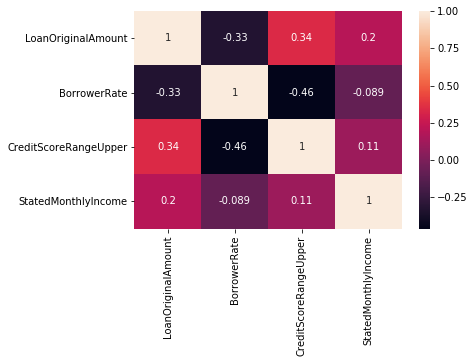

In [88]:
sns.heatmap(df[numeric_vars].corr(), annot = True);

C:\Users\Ernest\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ernest\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Ernest\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


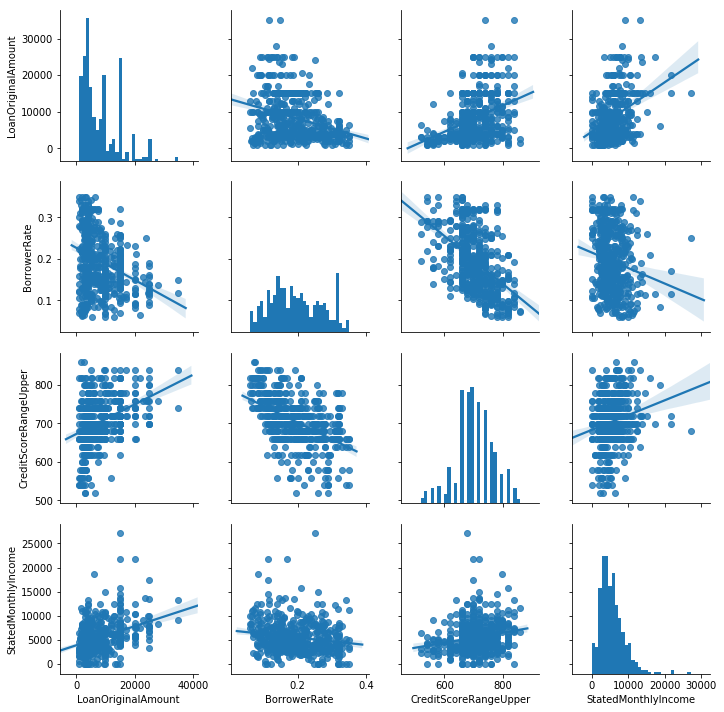

In [240]:
sample = np.random.choice(df.shape[0], 500, replace=False)
loan_sample = df.loc[sample]

g = sns.PairGrid(loan_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=30)
g.map_offdiag(sns.regplot);

As seen in the heatmap & scatter matrix, moderate correlations are seen between `LoanOriginalAmount`, `BorrowerRate`, & `CreditScoreRangeUpper`. The correlation between `StatedMonthlyIncome` and the other variables was very weak, so I won't be exploring it any further. `CreditScoreRangeUpper` showed the strongest correlation with my features of interest. 

There weren't any surprises here. The higher a person's credit score, the lower their interest rate and the higher their loan amount was.

Now I'll explore how categroical variables correlate with `LoanOriginalAmount` & `BorrowerRate`.

<Figure size 720x720 with 0 Axes>

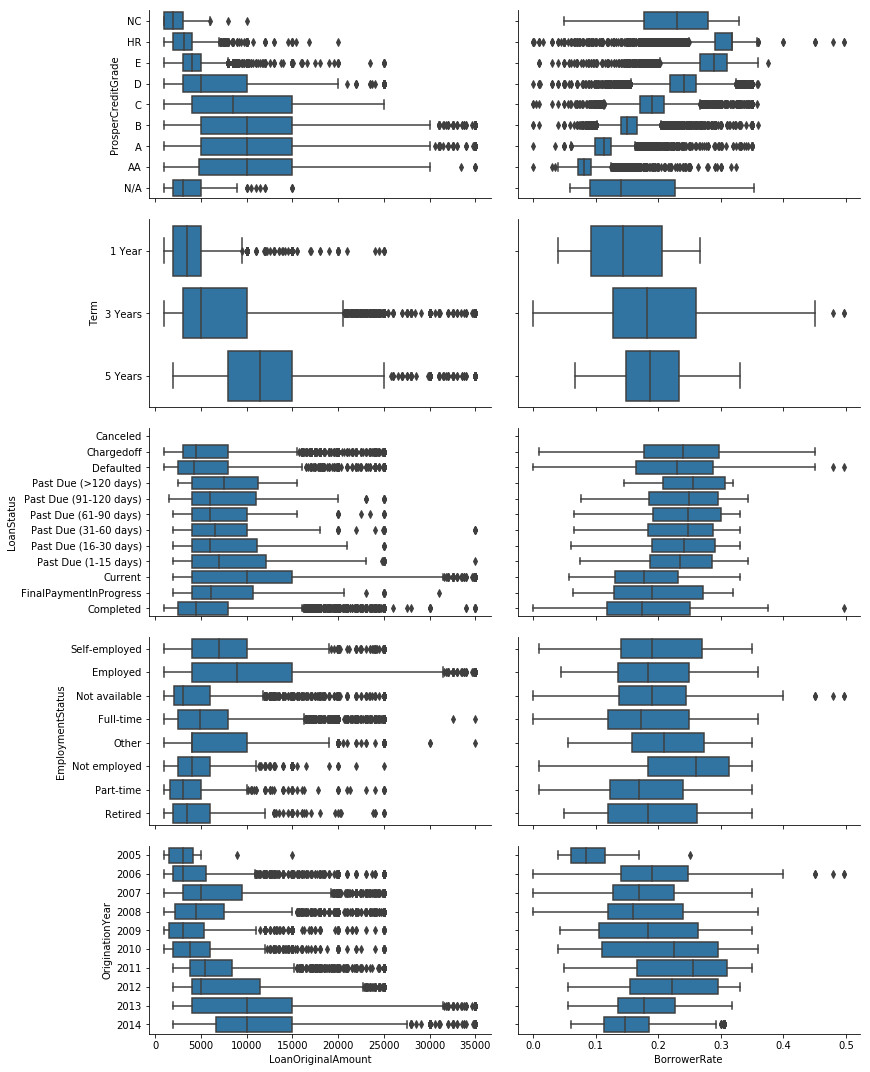

In [248]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color=default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data=df,  x_vars=['LoanOriginalAmount', 'BorrowerRate'], y_vars=categoric_vars,
                 height=3, aspect=1.8)
g.map(boxgrid);

Similar to what was seen with `CreditScoreRangeUpper`, `ProsperCreditGrade` was the best predictor of `LoanOriginalAmount` & `BorrowerRate`. The better the borrower's credit grade, the better the terms of their loan. The second best predictor was the loan `Term` where longer terms received both higher loan amounts and higher interest rates. The reason for this trend is that a longer term stretches the cost of the loan out over time, both increasing risk for the lender (higher interest rate) and making payments lower for the borrower which makes them eligible for a higher loan amount.

Looking at `LoanStatus`, it appears that loans that either go past due, get defaulted on, or are charged off have lower loan amounts and higher interest rates on average versus those that are current. I would guess that these borrowers have worse loan terms because they were high risk borrowers to begin with.

Grouping by `OriginationYear` shows that loan amounts were on the rise until the economy took a turn in 2008. After bottoming out in 2009, they've steadily risen over time and a new maximum loan amount was established in 2013. The relationship between `OriginationYear` and interest rate isn't as predictable, but appears to be inversely related to `LoanOriginalAmount`.

The labeling was inconsistent in the `EmploymentStatus` column, so I'll be excluding it from further analysis.

Now that we've looked at correlations bewteen numerical variables and how our features of interest relate to categorical variables, let's take a look at relationships between categories.

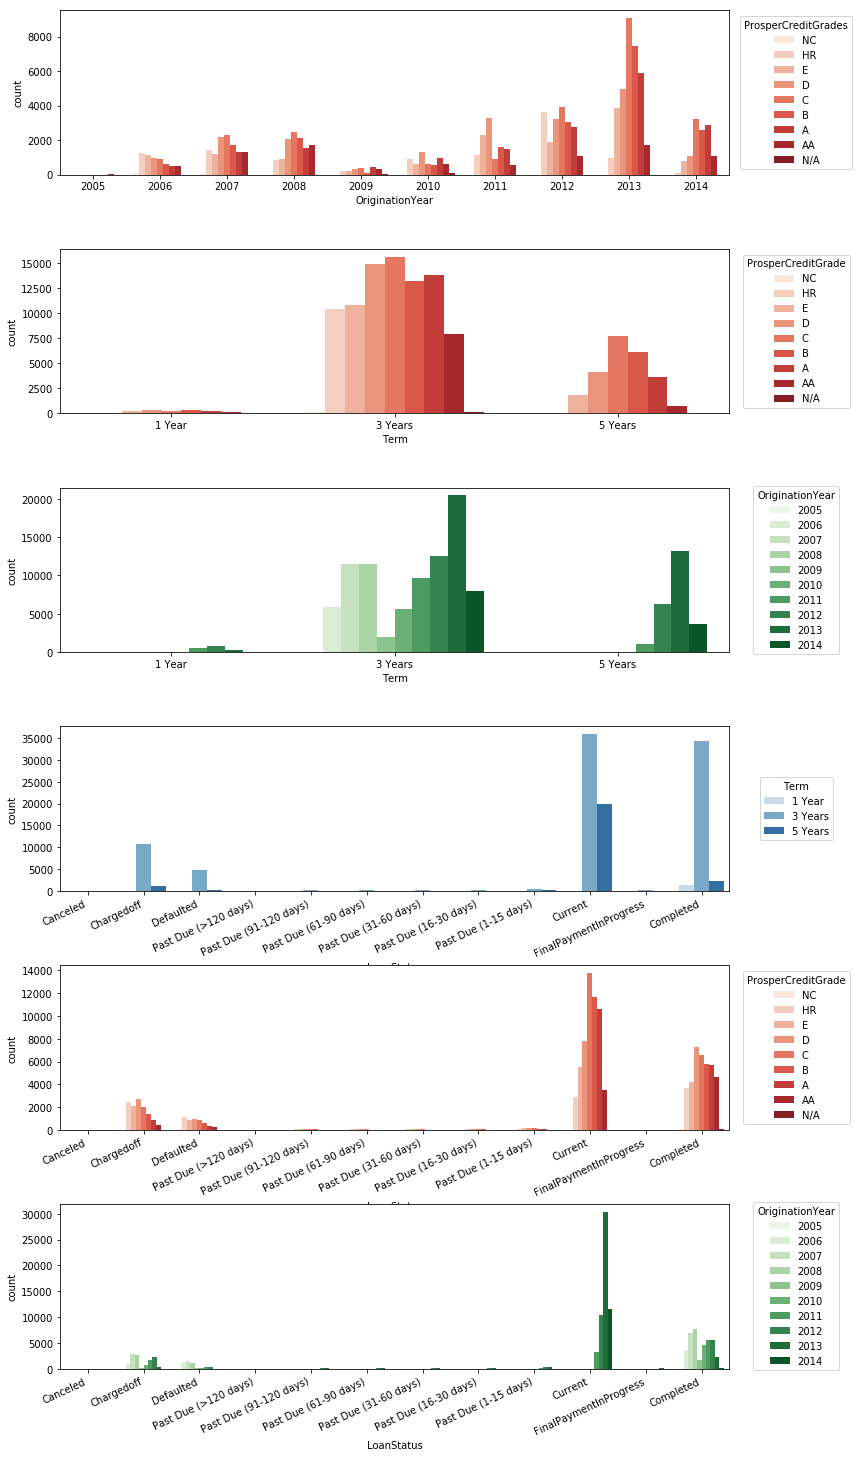

In [297]:
plt.figure(figsize = [12, 25])
plt.subplots_adjust(hspace=0.45)

ax = plt.subplot(6, 1, 1)
sns.countplot(data=df, x='OriginationYear', hue='ProsperCreditGrade', palette='Reds')
ax.legend(title='ProsperCreditGrades', loc='center', ncol=1, bbox_to_anchor=(1.1, 0.5))

ax = plt.subplot(6, 1, 2)
sns.countplot(data=df, x='Term', hue='ProsperCreditGrade', palette='Reds')
ax.legend(title='ProsperCreditGrade', loc=10, bbox_to_anchor=(1.1, 0.5))

ax = plt.subplot(6, 1, 3)
sns.countplot(data=df, x='Term', hue='OriginationYear', palette='Greens')
ax.legend(title='OriginationYear', loc=10, bbox_to_anchor=(1.1, 0.5))

ax = plt.subplot(6, 1, 4)
sns.countplot(data=df, x='LoanStatus', hue='Term', palette='Blues')
ax.legend(title='Term', loc=10, bbox_to_anchor=(1.1, 0.5))
ax.set_xticklabels(ordinal_var_dict['LoanStatus'], rotation=25, ha='right')

ax = plt.subplot(6, 1, 5)
sns.countplot(data=df, x='LoanStatus', hue='ProsperCreditGrade', palette='Reds')
ax.set_xticklabels(ordinal_var_dict['LoanStatus'], rotation=25, ha='right');
ax.legend(title='ProsperCreditGrade', loc='center', ncol=1, bbox_to_anchor=(1.1, 0.5))

ax = plt.subplot(6, 1, 6)
sns.countplot(data=df, x='LoanStatus', hue='OriginationYear', palette='Greens')
ax.set_xticklabels(ordinal_var_dict['LoanStatus'], rotation=25, ha='right')
ax.legend(title='OriginationYear', loc='center', ncol=1, bbox_to_anchor=(1.1, 0.5));

Prosper's lending footprint has changed quite a bit over the years. As seen in the first plot, they started off primarily as a subprime lender, but began to originate less high risk loans until the housing crisis in 2008. When they came back in 2009, they leaned towards subprime lending again, but began favoring borrowers with good credit in 2013. I expect this shift came after defaults started to pile up for higher risk loans as seen in plots 5 & 6. 

In the 2nd plot comparing `ProsperCreditGrade` & `Term`, you can see that all borrowers with NC or HR credit grades had a 3 Year term on their loan. I suspect this is due to different lending guidelines for 1 & 5 Year loan products since Prosper continues to lend to HR borrowers. Despite adding new loan products in 2011, the bulk of Prosper's lending continues to be loans with a 3 Year term. There was a small shift towards 5 Year terms when Prosper started shifting towards higher credit grades, but I expect 3 Year loans will continue to be the bread and butter for this company.

Now that I have a good idea of how these features relate to one another, there's a couple from the scatter matrix I made earlier that I'd like to get a better look at. Instead of visualizing a small subset of the data, I'll plot `CreditScoreRangeUpper` vs `BorrowerRate` & `CreditScoreRangeUpper` vs `LoanOriginalAmount` on a log scale.

In [496]:
# Function to calculate correlation coefficient between two arrays
    # Credit to https://stackoverflow.com/questions/30942577/seaborn-correlation-coefficient-on-pairgrid
def corr(x, y, xy=(1.02, 0.90), **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=xy, size=20, xycoords=ax.transAxes)

In [382]:
# Create column with log10 of LoanOriginalAmount.
df['LogLoanOriginalAmount'] = np.log10(df['LoanOriginalAmount'])

In [399]:
# Create subset that has NaN's removed.
df_subset = df[~((df.CreditScoreRangeUpper.isna())|(df.LogLoanOriginalAmount.isna()))]

C:\Users\Ernest\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


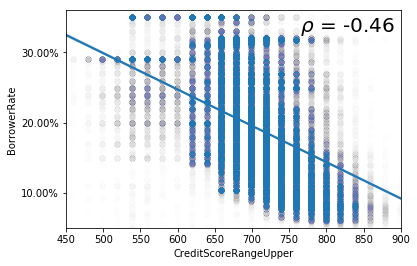

In [500]:
ax = sns.regplot(data=df_subset, x='CreditScoreRangeUpper', y='BorrowerRate', scatter_kws={'alpha':0.005})

plt.xlim(450, 900)
plt.xlabel('CreditScoreRangeUpper')

locs, labels = plt.yticks()

plt.yticks(locs, ['{:.2%}'.format(x) for x in locs])
plt.ylim(0.05, 0.36)
plt.ylabel('BorrowerRate');
corr(df_subset.CreditScoreRangeUpper, df_subset.BorrowerRate, xy=(0.7, 0.9))

C:\Users\Ernest\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


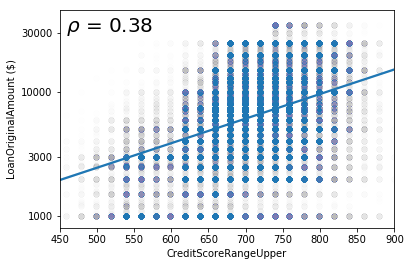

In [502]:
ax = sns.regplot(data=df_subset, x='CreditScoreRangeUpper', y='LogLoanOriginalAmount', scatter_kws={'alpha':0.005})

y_labels = [1000, 3000, 10000, 30000]

plt.xlim(450, 900)
plt.xlabel('CreditScoreRangeUpper')

plt.ylim(np.log10(800))
plt.yticks(np.log10(y_labels), y_labels)
plt.ylabel('LoanOriginalAmount ($)');
corr(df_subset.CreditScoreRangeUpper, df_subset.LogLoanOriginalAmount, xy=(0.02, 0.9))

As seen above, there is a moderate negative correlation between `CreditScoreRangeUpper` and `BorrowerRate`. The linear relationship here is very apparent, so transformations weren't necessary. However, for the 2nd plot with `CreditScoreRangeUpper` and `LoanOriginationAmount`, I performed a log transformation on `LoanOriginationAmount` to get a better fit. Comparing the $\rho$ value with the one on the heat map tells us this was a good move.

Next, I'll re-examine categorical features with `LogLoanOriginationAmount`.

In [506]:
# Remove EmploymentStatus from categoric_vars
categoric_vars.remove('EmploymentStatus')

C:\Users\Ernest\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


<Figure size 720x864 with 0 Axes>

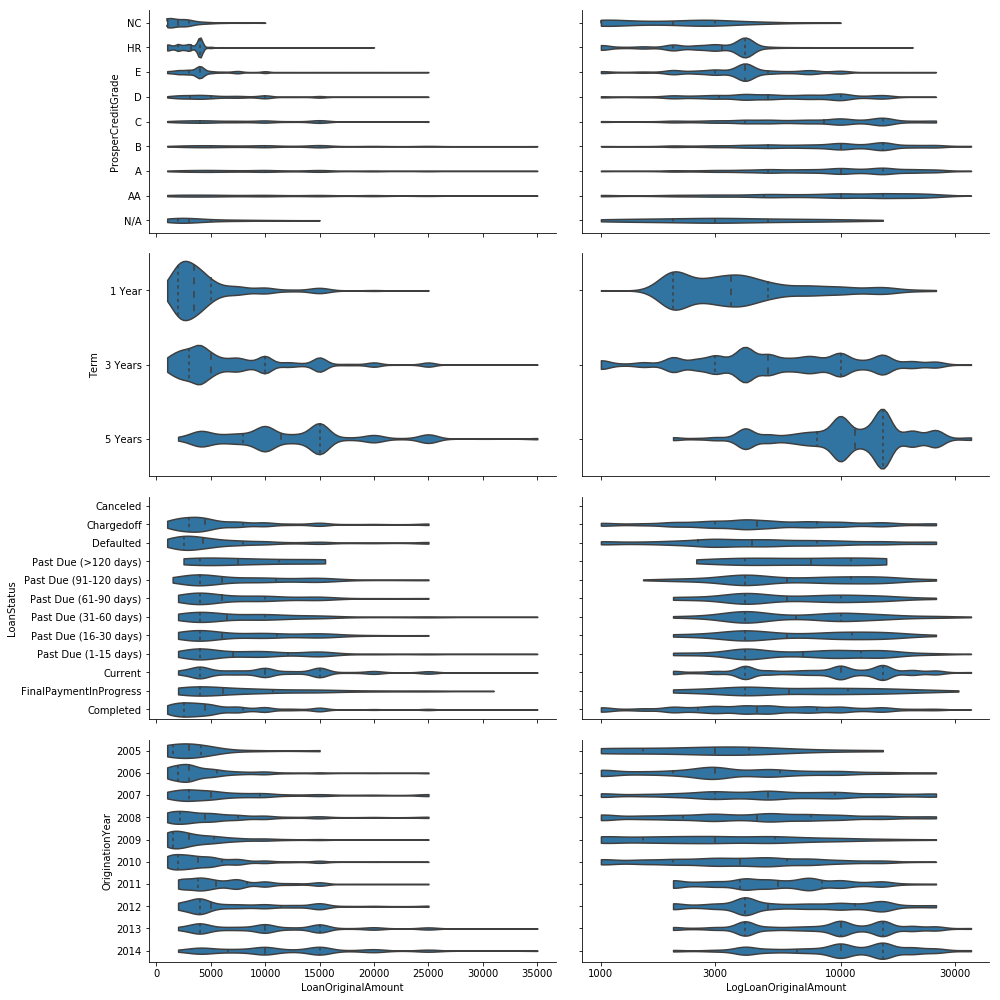

In [568]:
x_labels = [0, 1000, 3000, 10000, 30000]

plt.figure(figsize = [10, 12])
g = sns.PairGrid(data=df,  x_vars=['LoanOriginalAmount', 'LogLoanOriginalAmount'], y_vars=categoric_vars,
                 height=3.5, aspect=1.8)

g.axes[3,1].set_xticks(np.log10(x_labels))
g.axes[3,1].set_xticklabels(x_labels)

g.map(sns.violinplot, inner='quartile', cut=0);

Graphing on a log scale and using violin plots instead of box plots makes spotting trends in the dataset a lot easier. From the first plot, we can see that the overwhelming majority of NC, HR, & E loans have loan amounts of $\$$5,000 or lower, while borrowers with better credit have a much wider distribution. The loan `Term` plot shows exactly what you'd expect. 75\% of 1 year terms had loan amounts that were $\$$5,000 or less, 3 year terms had 75\% at $\$$10,000 or less, and 5 year terms had more than half of their loans over $\$$10,000. Not much is gained by plotting against `LoanStatus`, but looking at `OriginationYear`, you can see a very clear shift towards higher loan amounts in 2011 when the minimum loan amount was raised. The trend continues in 2013 & 2014 where the maximum loan amount was raised and a smaller proportion of loans had low loan amounts.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It comes as no surprise that `BorrowerRate` & `CreditScoreRangeUpper`had the strongest correlation out of all features plotted. The main reason people care about their credit score is because of the lower interest rates they can get with a high score. The relationship between `LoanOriginalAmount` & `CreditScoreRangeUpper` was less apparent, but ploting `LoanOriginalAmount` on a log scale strengthened the correlation. The reason for the weaker relationship is because borrowers with high credit scores don't always want a higher loan amount, whereas a high credit score almost always comes with a lower interest rate.

> When plotted against the categorical variables, we can see that both `LoanOriginalAmount` & `BorrowerRate` went up as the loan `Term` went up. This is in contrast to every other categorical variable where loan amount & interest rate seemed to be negatively correlated.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In the categorical plots, perhaps the most interesting was of `ProsperCreditGrade` grouped by `OriginationYear`. This graph shows how Prosper Loan's lending footprint changed over the years. They went from high risk in 2006, to more conservative in 2008 before starting the cycle over again when the housing market crashed. You can also see in the 5th categorical plot that `ProsperCreditGrade` was a very strong predictor of loan status. Higher risk borrowers with a D or lower were over represented in the Chargedoff & Defaulted categories and under represented in the Current & Completed categories.

## Multivariate Exploration

> In this section I'll look at the relationship that different categories have with `LoanOriginalAmount` & `BorrowerRate`.

C:\Users\Ernest\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


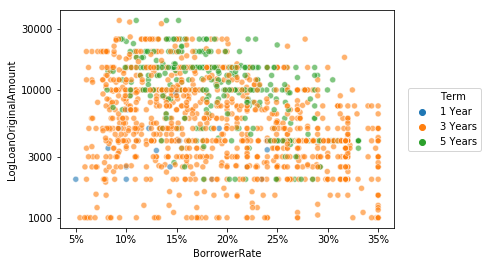

In [702]:
sample = np.random.choice(df_subset.shape[0], 1500, replace=True)
sample_set = df_subset.loc[sample,:]

y_labels = [1000, 3000, 10000, 30000]

sns.scatterplot(data=sample_set, x='BorrowerRate', y='LogLoanOriginalAmount', hue='Term', alpha=0.6)

plt.yticks(np.log10(y_labels), y_labels)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()]) 
plt.legend(loc=10, bbox_to_anchor=(1.15,0.5));

The flexibility of a 3 year loan makes it a great option for most borrowers. The loan amounts and interest rates for this `Term` have a very wide range of possible values, while 1 year terms generally had lower loan amounts and low to moderate interest rates. Initially I was surprised to see that 5 year loans leaned towards lower interest rates, however when you look back at the distribution of `ProsperCreditGrades` for 5 year loans it all makes sense. Since these loans are only available to borrowers with an E or above, they won't have interest rates at the extreme high end like you see with 3 year loans.

C:\Users\Ernest\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


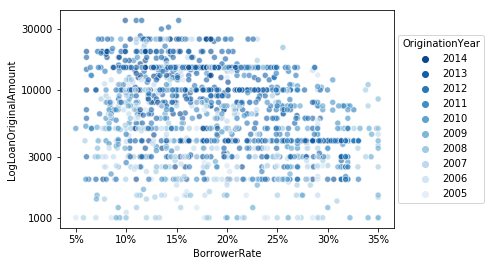

In [700]:
sample = np.random.choice(df_subset.shape[0], 1500, replace=True)
sample_set = df_subset.loc[sample,:]

y_labels = [1000, 3000, 10000, 30000]

sns.scatterplot(data=sample_set, x='BorrowerRate', y='LogLoanOriginalAmount', hue='OriginationYear', 
                alpha=0.6, palette='Blues')

plt.gca().set_xticklabels('{:.0f}%'.format(x*100) for x in plt.gca().get_xticks())
plt.yticks(np.log10(y_labels), y_labels)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[-1:0:-1], labels[-1:0:-1], loc=10, title='OriginationYear', bbox_to_anchor=(1.14, 0.5));

The darker points on this scatterplot represent loans from recent years while the ligher points represent older loans. The darker points being clustered in the upper left quadrant makes the trend towards higher loan amounts and lower interest rates quite clear.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!